In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.preprocessing import OneHotEncoder,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression ,SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor ,ExtraTreesRegressor ,AdaBoostRegressor ,VotingRegressor
from sklearn.svm import SVR ,LinearSVR
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRFRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.feature_selection import RFECV 

import os
import plotly_express as px
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [2]:
FILE_PATH = "../input/car-details-dataset/CAR DETAILS FROM CAR DEKHO.csv"
df = pd.read_csv(FILE_PATH)

# EDA

In [3]:
print('# Row' ,df.shape[0] , 'And # Cols:',df.shape[1])
print('Columns Names : ')
print(df.columns.values)

# Row 4340 And # Cols: 8
Columns Names : 
['name' 'year' 'selling_price' 'km_driven' 'fuel' 'seller_type'
 'transmission' 'owner']


In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [7]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [8]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [9]:
print('# Duplicate : ',df.duplicated().sum())


# Duplicate :  763


- we have 8 columns and 4340 rows (763 Duplicate)
- three Column Number ( one Categorical Column 'year')
- Five String Columns (4 categorical )

### Drop Duplicate

In [10]:
df = df.drop_duplicates()
df.reset_index(drop=True,inplace=True)
print('# Rows After drop Duplicate',df.shape[0])

# Rows After drop Duplicate 3577


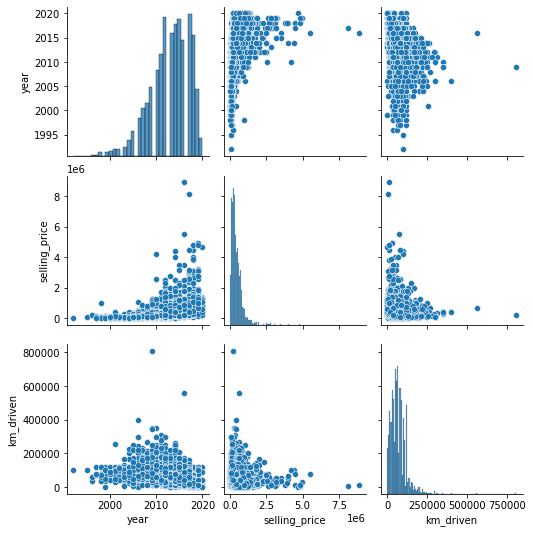

In [11]:
sns.pairplot(df)
plt.show()

In [12]:
px.box(df.selling_price)

In [13]:
df = df[df['selling_price']<1000000 ]

In [14]:
px.histogram(df.transmission)

In [15]:
px.histogram(df.selling_price)

In [16]:
px.histogram(np.log(df.selling_price))

In [17]:
px.histogram(df['km_driven'])

In [18]:
px.box(df['km_driven'])

In [19]:
df = df[df['km_driven']<160000]

In [20]:
px.box(df['km_driven'])

In [21]:
px.bar(df['owner'])

In [22]:
def Show_Column_countplot(DataFrame,column_name:str,rotation:int ,title:str):
    plt.figure(figsize=(8,5))
    sns.countplot(data=DataFrame,y=column_name)
    plt.yticks(rotation=rotation)
    plt.title(title)
    plt.show()

In [23]:
bins = [1990, 1995, 2000, 2005, 2010, 2015, 2020]
labels = [1,2,3,4,5,6]
df['bin year'] = pd.cut(df['year'], bins=bins, labels=labels)

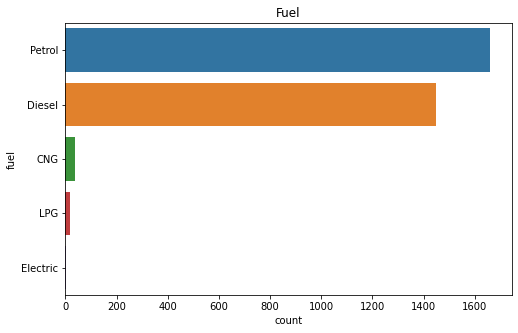

In [24]:
Show_Column_countplot(df,'fuel',0,'Fuel')

In [25]:
print(df['fuel'].unique())

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']


In [26]:
fuel_type = ['CNG','LPG','Electric']
df['fuel'] = df['fuel'].apply(lambda x : 'other' if x  in fuel_type else x)

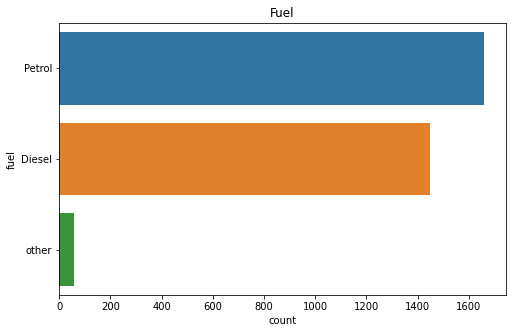

In [27]:
Show_Column_countplot(df,'fuel',0,'Fuel')

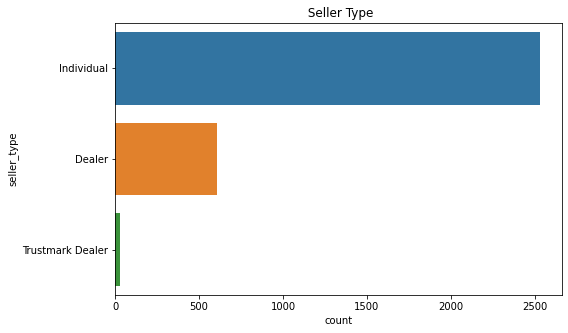

In [28]:
Show_Column_countplot(df,'seller_type',0 ,' Seller Type')

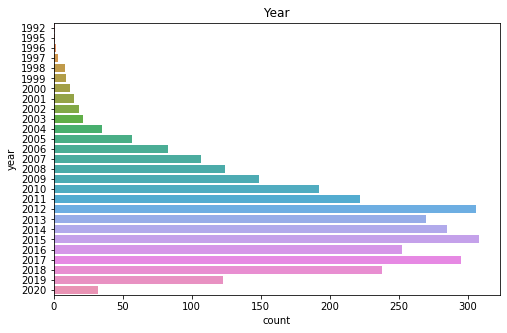

In [29]:
Show_Column_countplot(df,'year',0,' Year ')

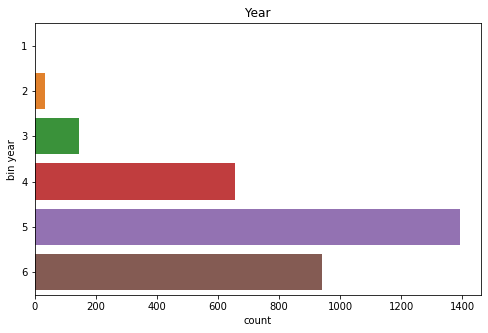

In [30]:
Show_Column_countplot(df,'bin year',0,' Year ')

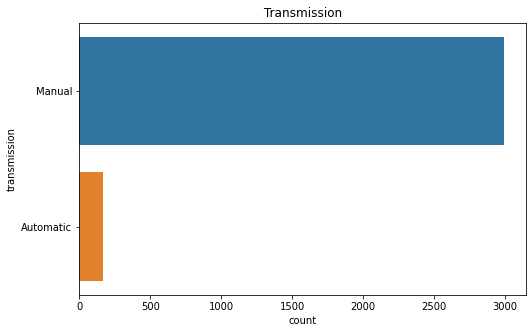

In [31]:
Show_Column_countplot(df,'transmission',0,' Transmission ')

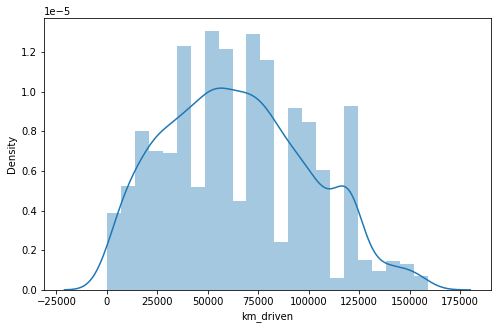

In [32]:
plt.figure(figsize=(8,5))
sns.distplot(df['km_driven'])
plt.show()

In [33]:
print(df['transmission'].unique())
df['transmission'].tail()

['Manual' 'Automatic']


3572    Manual
3573    Manual
3574    Manual
3575    Manual
3576    Manual
Name: transmission, dtype: object

In [34]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,bin year
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,4
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,4
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,5
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,6
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,5
...,...,...,...,...,...,...,...,...,...
3572,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,5
3573,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,5
3574,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,4
3575,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,6


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3168 entries, 0 to 3576
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           3168 non-null   object  
 1   year           3168 non-null   int64   
 2   selling_price  3168 non-null   int64   
 3   km_driven      3168 non-null   int64   
 4   fuel           3168 non-null   object  
 5   seller_type    3168 non-null   object  
 6   transmission   3168 non-null   object  
 7   owner          3168 non-null   object  
 8   bin year       3168 non-null   category
dtypes: category(1), int64(3), object(5)
memory usage: 355.1+ KB


In [36]:
int_cols = []
for i in df.columns:
    if df[i].dtype == "int64":
        int_cols.append(i)
int_cols

['year', 'selling_price', 'km_driven']

In [37]:
cat_cols = []
for i in df.columns:
    if df[i].dtype != "int64" and i != 'name':
        cat_cols.append(i)
        
cat_cols

['fuel', 'seller_type', 'transmission', 'owner', 'bin year']

In [38]:
for i in cat_cols:
    df[i] = df[i].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3168 entries, 0 to 3576
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           3168 non-null   object  
 1   year           3168 non-null   int64   
 2   selling_price  3168 non-null   int64   
 3   km_driven      3168 non-null   int64   
 4   fuel           3168 non-null   category
 5   seller_type    3168 non-null   category
 6   transmission   3168 non-null   category
 7   owner          3168 non-null   category
 8   bin year       3168 non-null   category
dtypes: category(5), int64(3), object(1)
memory usage: 269.1+ KB


In [39]:
corr = df.corr()
corr = corr['selling_price']
corr = corr.sort_values(ascending=False)
px.bar(corr)

In [40]:
def split_data(df):
    df = pd.get_dummies(df.drop(['name'],axis=1)) 
    x  = df.drop(['selling_price'],axis=1).values
    y  = np.log(df['selling_price'].values)
    x_train ,x_test , y_train,y_test = train_test_split(x,y,test_size=.4,random_state=42)
    return x_train ,x_test , y_train,y_test

In [41]:
def train_and_test(models,df):
    acc = []
    x_train ,x_test , y_train,y_test = (split_data(df))
    for model in models:
        model.fit(x_train,y_train)
        y_h = model.predict(x_test) 
        r2  = r2_score(y_test,y_h)
        acc.append([model.__class__.__name__,r2])
    return pd.DataFrame(acc,columns=['name','r2']).sort_values(by='r2',ascending=False)

In [42]:
models = [
    LinearRegression() ,
    SGDRegressor(random_state=42) ,
    CatBoostRegressor(random_state=42,verbose=False),
    ExtraTreesRegressor(random_state=42),
    DecisionTreeRegressor(random_state=42),
    SVR(),
    AdaBoostRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42),
    XGBRFRegressor(),
    LinearSVR()
]
train_and_test(models,df)

,name,r2
0,LinearRegression,6.651546e-01
8,GradientBoostingRegressor,6.600009e-01
9,XGBRFRegressor,6.494958e-01
2,CatBoostRegressor,6.457693e-01
6,AdaBoostRegressor,6.303115e-01
7,RandomForestRegressor,5.650283e-01
3,ExtraTreesRegressor,4.763798e-01
4,DecisionTreeRegressor,4.037197e-01
5,SVR,7.484345e-02
10,LinearSVR,-1.386982e+00


In [43]:
def get_best_cols(model,df):
    df = pd.get_dummies(df.drop(['name'],axis=1)) 
    x  = df.drop(['selling_price'],axis=1).values
    y  = df['selling_price'].values
    selector = RFECV(model,cv=10,n_jobs=-1)
    selector = selector.fit(x,y)
    return selector

In [44]:
def train_with_selected_cols(model,df ,cols):
    df = pd.get_dummies(df.drop(['name'],axis=1)) 
    x  = df.drop(['selling_price'],axis=1)
    x  = df[df.columns[cols]].values
    y  = df['selling_price'].values
    x_train ,x_test , y_train,y_test = train_test_split(x,y,test_size=.4,random_state=42)
    model.fit(x_train,y_train)
    y_h = model.predict(x_test) 
    r2  = r2_score(y_test,y_h)
    return [model.__class__.__name__,r2]

In [45]:
model  = LinearRegression()
select = get_best_cols(model,df)
print(select.ranking_)
select.support_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [46]:
model  = GradientBoostingRegressor()
select = get_best_cols(model,df)
print(select.ranking_)
select.support_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 3 1 1 1 1]


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True])

In [47]:
# model  = GradientBoostingRegressor()
# select = get_best_cols(model,df)
# train_with_selected_cols(model,df,select.support_)